## _Medical Insurance Costs_

Pada kasus ini, terdapat data tentang informasi kesehatan dan biaya yang harus dikeluarkan oleh asuransi kesehatan. Infomasi terkait dengan data _medical insurance cost_ adalah sebagai berikut,

1. Age: Usia penerima manfaat
2. Sex: Gender penerima manfaat (_male_, _femele_)
3. Bmi : Body Mass Index
4. Children: Jumlah anak/tanggungan yang dicover oleh pihak asuransi
5. Smoker: Status perokok (_yes_, _no_)
6. Region: Wilayah tempat tinggal penerima manfaat
7. Charges: Biaya yang dikeluarkan oleh asuransi

In [1]:
# Selayang pandang data Medical Insurance Costs
import pandas as pd

df = pd.read_csv('data/insurance.csv')

display(df.head())

display(df.corr())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\User\AppData\Local\Temp\ipykernel_5268\1982607319.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr())


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Tantangan

Buatlah model regresi untuk memprediksi biaya yang harus dikeluarkan oleh pihak asuransi berdasarkan data. Validasi performa model regresi Anda dengan nilai ***R-squared ($R^2$)***

#### _Tasks_

1. Pastikan semua variabel kategorial diolah dengan baik. (Gunakan fitur mapping pada pandas)
2. Cek kondisi multicollinearity untuk semua variabel independen. Jika ada, antar variabel apakah itu?
3. Pastikan model menggunakan variabel yang tidak memiliki nilai multicollinearity yang tinggi
4. (Hints) Anda dapat menggunakan nilai ***Variance Inflation Factor (VIF)*** untuk mengetahui tingkat multicollinearity pada sebuah variabel independent.
5. Evaluasi model yang Anda buat dengan nilai $R^2$
6. Simpulkan, variabel independen apa saja yang dapat digunakan untuk menghasilkan model regresi yang baik pada kasus _medical insurance costs_?

#### (Hints) Interpretasi Nilai VIF

- 1 - variabel indenpenden tidak memiliki korelasi dengan variabel independen yang lain
- 1 < VIF < 5 - variabel independen sedikit memiliki korelasi dengan variabel independen yang lain
- VIF > 5 - variabel independen memiliki korelasi yang kuat dengan variabel independen lainnya
- VIF > 10 - variabel independen miliki korelasi yang sangat kuat dengan variabel independen dan perlu diperhatikan lebih lanjut

#### (Hints) Implementasi Perhitungan VIF

VIF dapat dihitung secara langsung dengan menggunakan library dari `statsmodels`

#### (Hints) Scatterplot Korelasi Antar Variabel

![var_cor](assets/var_corr.png)

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

EDA

In [3]:
df.shape, df.head()

((1338, 7),
    age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

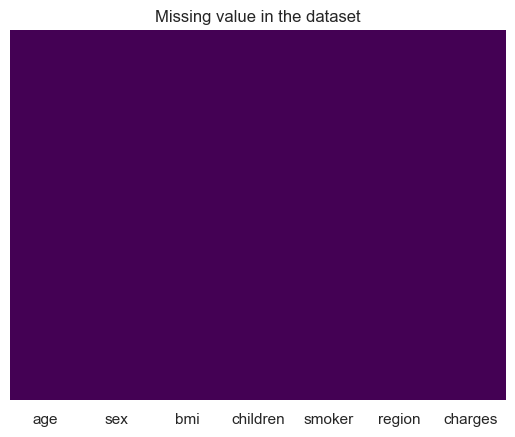

In [94]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');


In [5]:
df['sex'].unique().sum(), df['smoker'].unique().sum(), df['region'].unique().sum()

('femalemale', 'yesno', 'southwestsoutheastnorthwestnortheast')

C:\Users\User\AppData\Local\Temp\ipykernel_5268\1408977041.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['charges'], color = 'c', kde = True)


Text(0.5, 1.0, 'Distribusi data CHARGES')

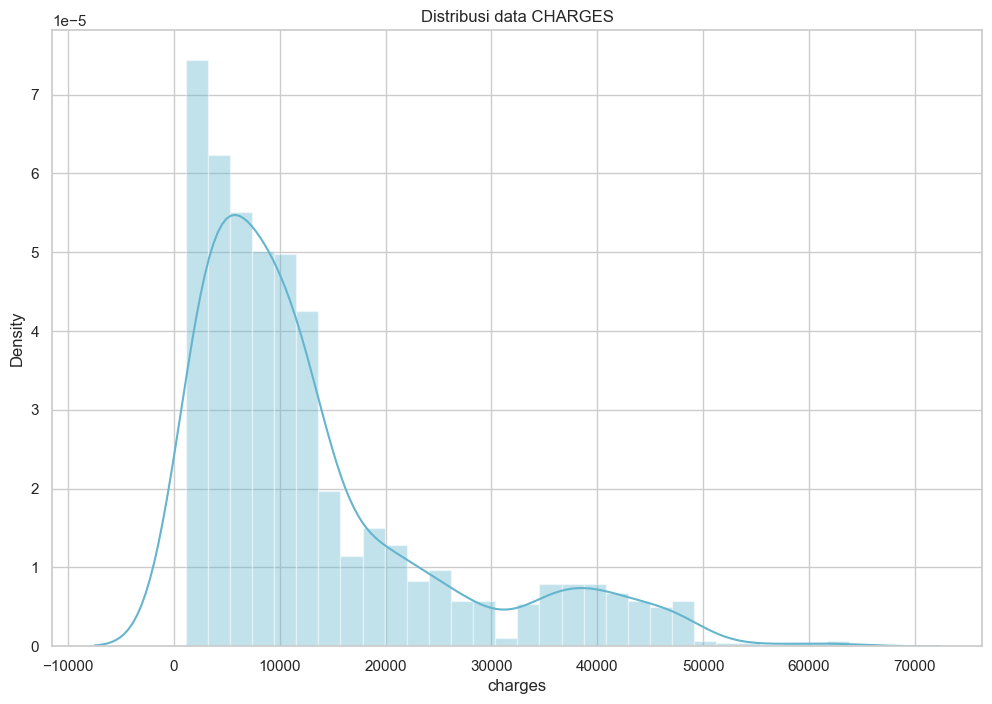

In [19]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.distplot(df['charges'], color = 'c', kde = True)
plt.title('Distribusi data CHARGES')

Distribusi ini miring ke kanan. Untuk membuatnya mendekati normal kita bisa menerapkan natural log

C:\Users\User\AppData\Local\Temp\ipykernel_5268\3050198714.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )


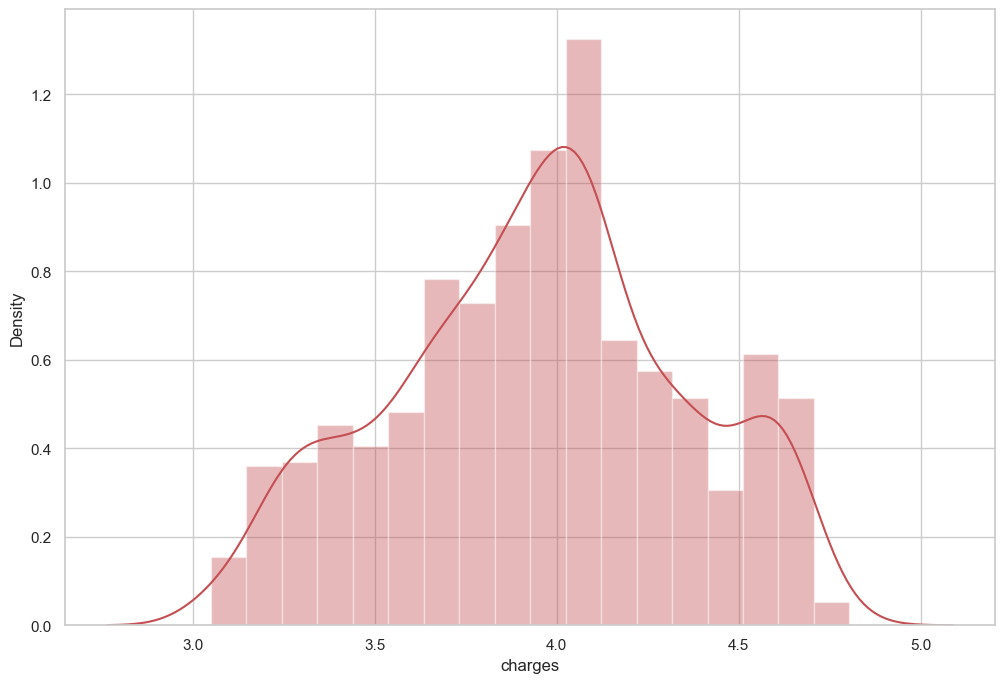

In [20]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

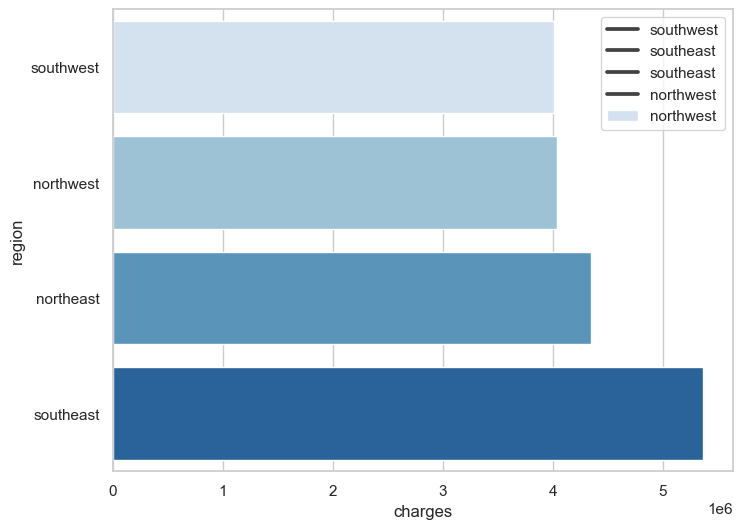

In [45]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x= charges.head(), y = charges.head().index, palette='Blues')
plt.legend(df.region)


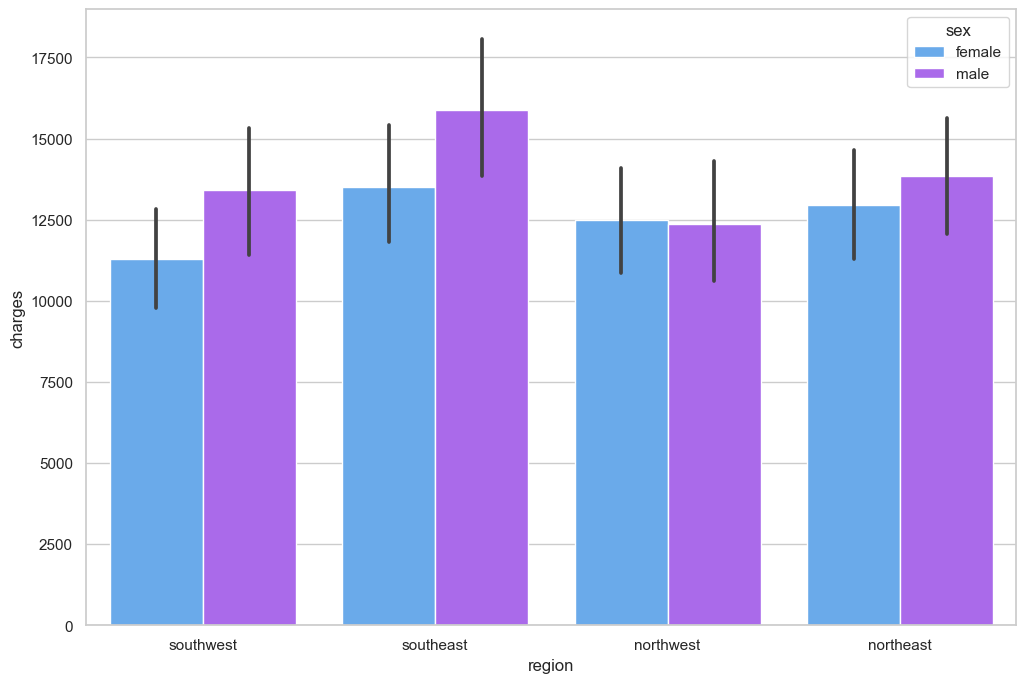

In [41]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

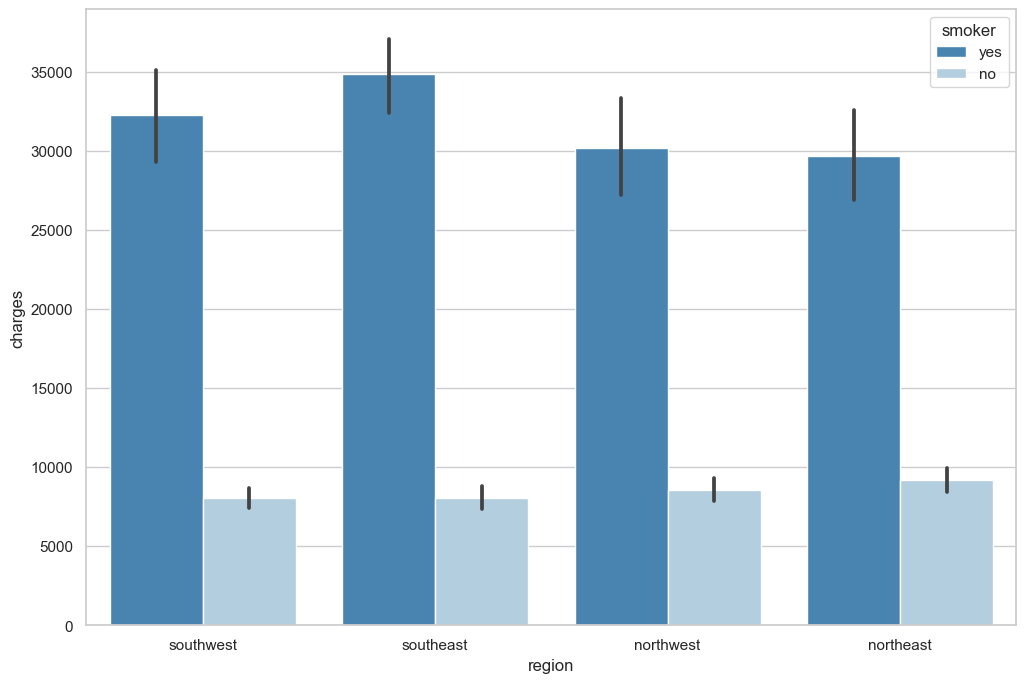

In [48]:
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette='Blues_r')

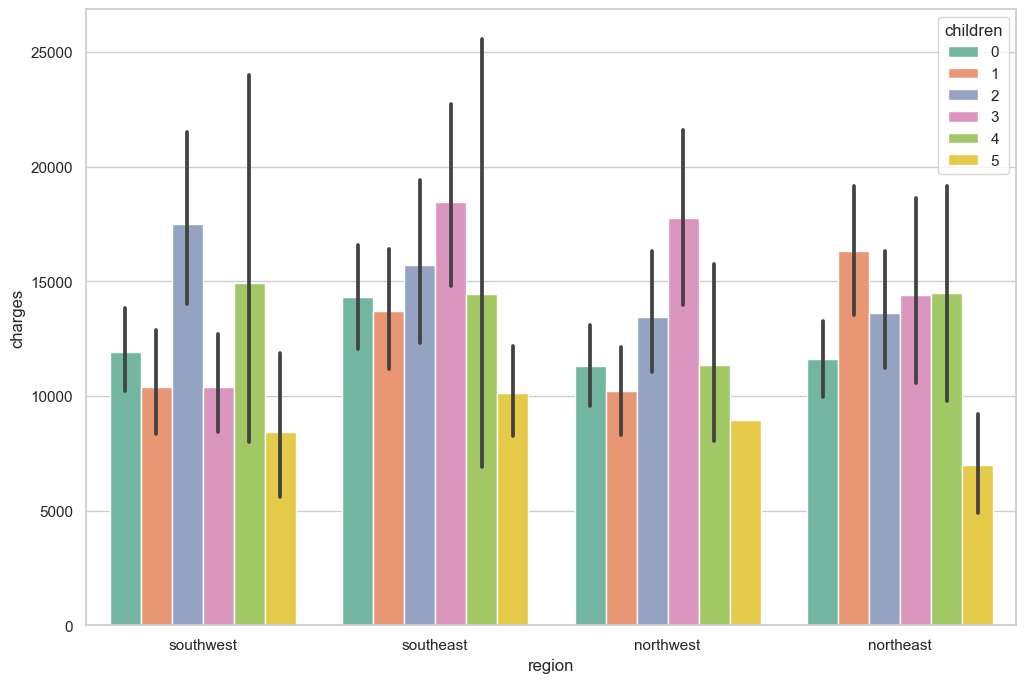

In [49]:
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df, palette='Set2')

Seperti yang dapat kita lihat dari barplot ini, pungutan tertinggi akibat merokok masih di Tenggara tetapi terendah di Timur Laut. Orang di Southwest umumnya merokok lebih banyak daripada orang di Northeast, tetapi orang di Northeast memiliki biaya lebih tinggi berdasarkan jenis kelamin daripada di Southwest dan Northwest secara keseluruhan. Dan orang-orang dengan anak-anak cenderung memiliki biaya medis yang lebih tinggi secara keseluruhan juga

Sekarang mari kita analisis biaya medis berdasarkan usia, BMI dan anak menurut faktor merokok

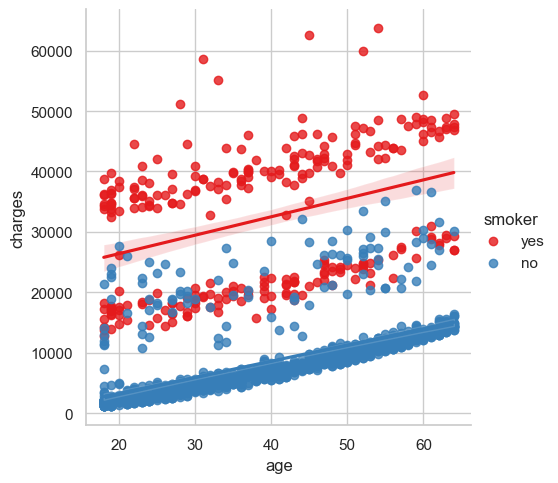

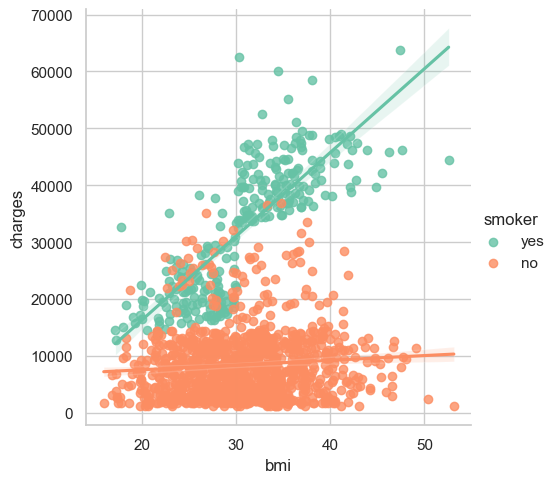

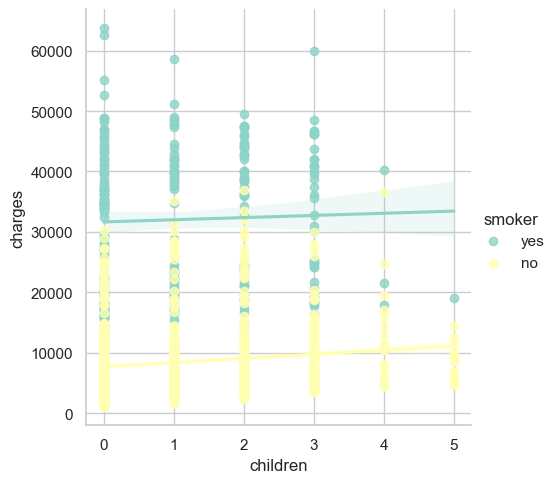

In [52]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set3')

Merokok memiliki dampak paling tinggi terhadap biaya pengobatan, meskipun biaya tersebut bertambah seiring bertambahnya usia, BMI dan anak-anak. Juga orang-orang yang memiliki anak umumnya merokok lebih sedikit, yang juga ditunjukkan oleh plot biola berikut

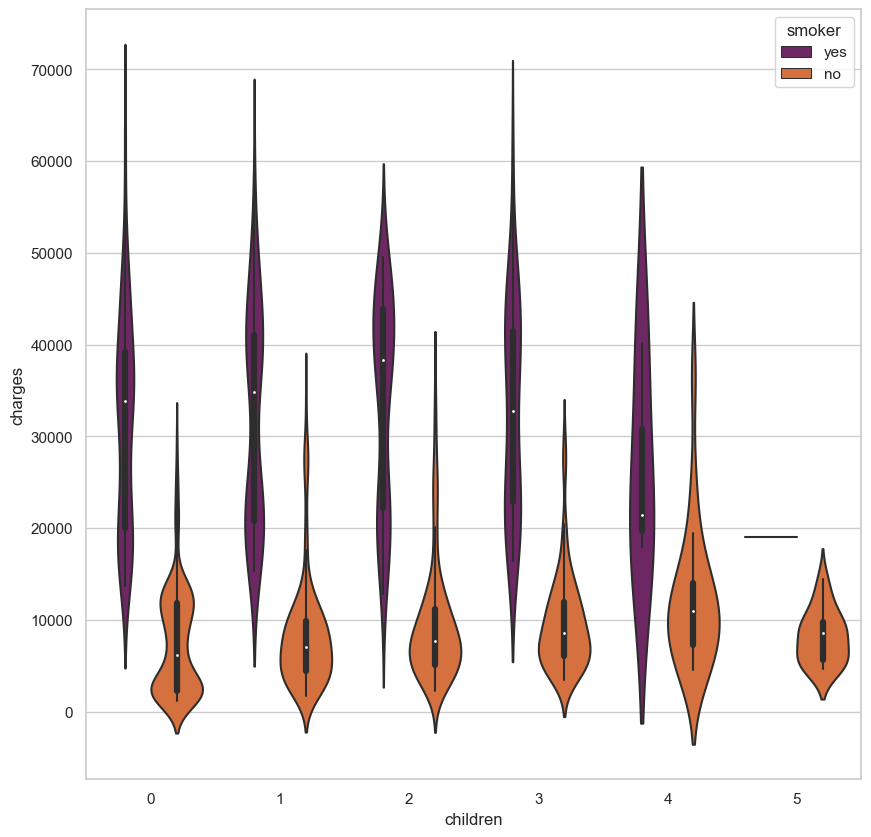

In [53]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df, orient='v', hue='smoker', palette='inferno')

In [56]:
encode = LabelEncoder()
df['sex'] = encode.fit_transform(df['sex'])
df['smoker'] = encode.fit_transform(df['smoker'])
df['region'] = encode.fit_transform(df['region'])
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [57]:
df['sex'].unique(), df['smoker'].unique(), df['region'].unique()

(array([0, 1]), array([1, 0]), array([3, 2, 1, 0]))

In [58]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                        for i in range(len(X.columns))]

print(vif_data)

    feature        VIF
0       age   9.247094
1       sex   2.007028
2       bmi  10.465005
3  children   1.805834
4    smoker   4.008939
5    region   2.951032
6   charges   7.922113


bmi dan age memiliki nilai multicollinearity yang tinggi, ini membuat kita tidak dapat menggunakan kedua fitur tersebut untuk model kita.

<Figure size 800x800 with 0 Axes>

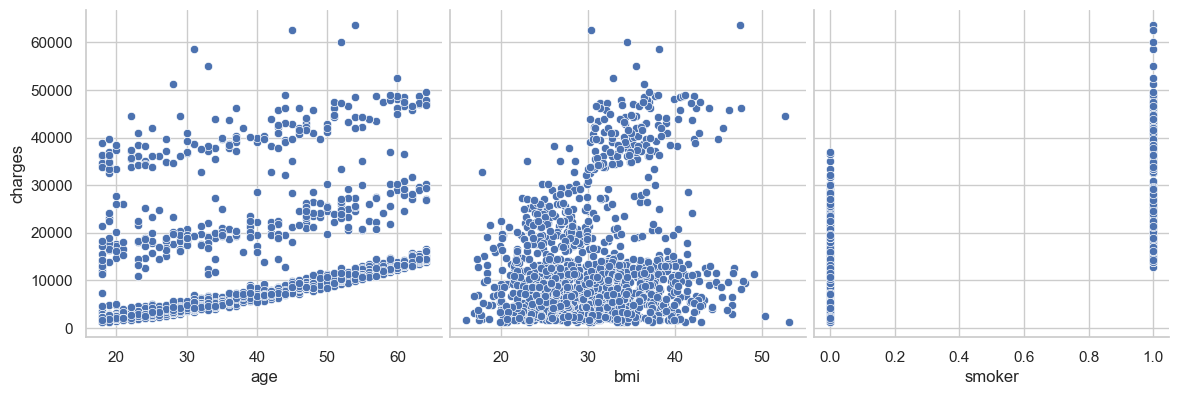

In [59]:
plt.figure(figsize = (8,8))
sns.pairplot(df, x_vars=['age', 'bmi','smoker'], 
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

<AxesSubplot: >

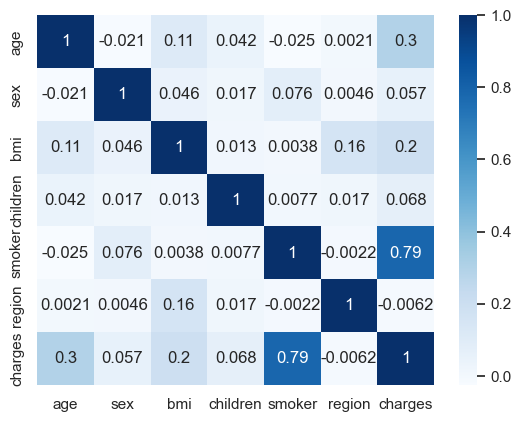

In [60]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

dari heatmap diatas, smoker dan charges memiliki korelasi yang cukup tinggi. Kita dapat membuat regresi dari kedua variabel tersebut

MODELING

In [91]:
X = df.drop(['charges'], axis = 1)
y = df['charges']

X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 100)

In [89]:
# hasil training dtaset
X_train.shape, y_train.shape

((1070, 6), (1070,))

In [81]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.intercept_)
print(lr.coef_)
print(f"AKURASI DARI MODEL ADALAH = {lr.score(X_test, y_test)}")

-10428.119803691518
[ 2.59634761e+02 -5.43235302e-02  2.93390832e+02  4.67684029e+02
  2.40111697e+04 -4.99424941e+02]
AKURASI DARI MODEL ADALAH = 0.7782937842162722


In [71]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [72]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const      -10428.119804
age           259.634761
sex            -0.054324
bmi           293.390832
children      467.684029
smoker      24011.169706
region       -499.424941
dtype: float64

In [73]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     435.6
Date:                Thu, 02 Feb 2023   Prob (F-statistic):          5.63e-266
Time:                        13:24:21   Log-Likelihood:                -9503.1
No. Observations:                 936   AIC:                         1.902e+04
Df Residuals:                     929   BIC:                         1.905e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.043e+04   1150.477     -9.064      0.000   -1.27e+04   -8170.286
age          259.6348     14.598     17.786      0.000     230.987     288.283
sex           -0.0543    408.970     -0.000      1.000    -802.666     802.558
bmi          293.3908     33.625      8.725      0.000     227.402     359.380
children     467.6840    169.422      2.760      0.006     135.190     800.178
smoker      2.401e+04    516.044     46.529      0.000     2.3e+04     2.5e+04
region      -499.4249    189.415     -2.637      0.009    -871.156    -127.694
==============================================================================
Omnibus:                      224.452   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.473
Skew:                           1.272   Prob(JB):                    1.18e-117
Kurtosis:                       5.708   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

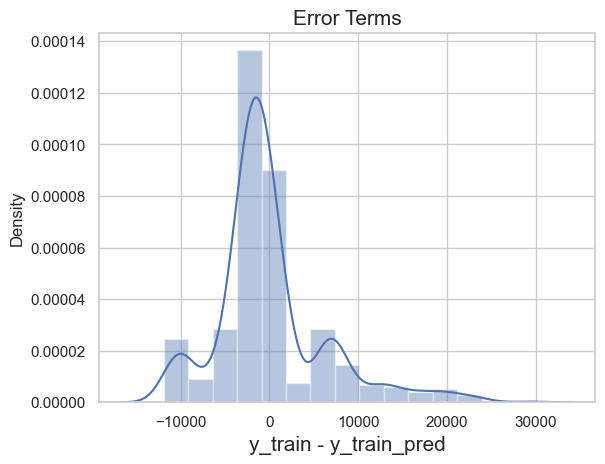

In [76]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [78]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

12      4137.795178
306     4346.994621
318     8607.174287
815     2995.801113
157    25642.535475
dtype: float64

In [79]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7782937842162723

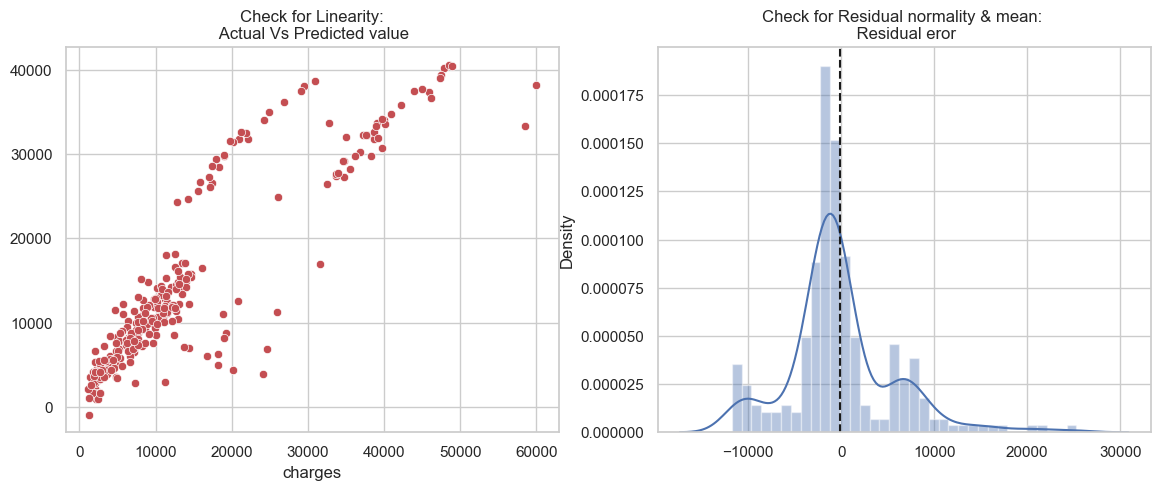

In [97]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x= y_test,y= y_test_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_test_pred),ax=ax,color='b')
ax.axvline((y_test - y_test_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

UJI MODEL

In [102]:
##Predicting the charges
y_test_pred = lr.predict(X_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
12,1826.84300,4137.795178
306,20177.67113,4346.994621
318,7421.19455,8607.174287
815,1877.92940,2995.801113
157,15518.18025,25642.535475
...,...,...
713,1984.45330,6638.048070
1282,14283.45940,24611.321023
531,14043.47670,14978.526471
537,8825.08600,9812.575561
